In [1]:
import pandas as pd
import numpy as np

In [30]:
#Read files:
train= pd.read_csv('train1.csv')
test= pd.read_csv('test.csv')

In [31]:
#concatinating train and test files
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(69713, 23) (30037, 22) (99750, 23)


In [32]:
#data exploration
#checking missing values in the data set
data.apply(lambda x: sum(x.isnull()),axis=0)

#the ........columns have so and so missing values so we will impute it lATER

'ID                                        0
Approved                               30037
City_Category                           1128
City_Code                               1128
Contacted                                  0
Customer_Existing_Primary_Bank_Code    13428
DOB                                       18
EMI                                    67822
Employer_Category1                      5623
Employer_Category2                      5993
Employer_Code                           5623
Existing_EMI                              83
Gender                                     0
Interest_Rate                          67822
Lead_Creation_Date                         0
Loan_Amount                            39580
Loan_Period                            39580
Monthly_Income                             0
Primary_Bank_Type                      13428
Source                                     0
Source_Category                            0
Var1                                       0
source    

In [33]:
data.describe()

,Approved,EMI,Employer_Category2,Existing_EMI,Interest_Rate,Loan_Amount,Loan_Period,Monthly_Income,Var1
count,69713.000000,31928.000000,93757.000000,99667.000000,31928.000000,60170.000000,60170.000000,9.975000e+04,99750.000000
mean,0.014631,1099.485718,3.722623,357.310193,19.233814,39445.986372,3.894399,5.126893e+03,3.952622
std,0.120073,745.125218,0.803623,1990.517471,5.857761,30667.188339,1.162487,1.466628e+05,3.819744
min,0.000000,118.000000,1.000000,0.000000,11.990000,5000.000000,1.000000,0.000000e+00,0.000000
25%,0.000000,642.750000,4.000000,0.000000,15.250000,20000.000000,3.000000,1.650000e+03,0.000000
50%,0.000000,943.000000,4.000000,0.000000,18.000000,30000.000000,4.000000,2.500000e+03,2.000000
75%,0.000000,1293.000000,4.000000,350.000000,20.000000,50000.000000,5.000000,4.000000e+03,7.000000
max,1.000000,13556.000000,4.000000,545436.500000,37.000000,300000.000000,6.000000,3.838384e+07,10.000000


In [6]:
#monthly income of some employees is zero.... means they are employed, or the data is incorrect
#comparing mean and meian of the existing emi, monthlyincome we cocnclude that they are skewed
#right and left skewness
#loan period ranges from 1- 6 years
#

In [29]:
data.apply(lambda x: len(x.unique()))

'ID                                    99750
Approved                                   3
City_Category                              4
City_Code                                705
Contacted                                  2
Customer_Existing_Primary_Bank_Code       58
DOB                                    11673
EMI                                     2413
Employer_Category1                         4
Employer_Category2                         5
Employer_Code                          48282
Existing_EMI                            4094
Gender                                     2
Interest_Rate                             73
Lead_Creation_Date                        92
Loan_Amount                              207
Loan_Period                                7
Monthly_Income                          6362
Primary_Bank_Type                          3
Source                                    33
Source_Category                            7
Var1                                       5
source    

In [8]:
data.dtypes

'ID                                     object
Approved                               float64
City_Category                           object
City_Code                               object
Contacted                               object
Customer_Existing_Primary_Bank_Code     object
DOB                                     object
EMI                                    float64
Employer_Category1                      object
Employer_Category2                     float64
Employer_Code                           object
Existing_EMI                           float64
Gender                                  object
Interest_Rate                          float64
Lead_Creation_Date                      object
Loan_Amount                            float64
Loan_Period                            float64
Monthly_Income                         float64
Primary_Bank_Type                       object
Source                                  object
Source_Category                         object
Var1         

In [9]:
#unique vals
data.apply(lambda x: len(x.unique()))

'ID                                    99750
Approved                                   3
City_Category                              4
City_Code                                705
Contacted                                  2
Customer_Existing_Primary_Bank_Code       58
DOB                                    11673
EMI                                     2413
Employer_Category1                         4
Employer_Category2                         5
Employer_Code                          48282
Existing_EMI                            4094
Gender                                     2
Interest_Rate                             73
Lead_Creation_Date                        92
Loan_Amount                              207
Loan_Period                                7
Monthly_Income                          6362
Primary_Bank_Type                          3
Source                                    33
Source_Category                            7
Var1                                       5
source    

In [10]:
#checking the distribution of categorical columns
categorical_cols=['City_Category','City_Code','Contacted','Customer_Existing_Primary_Bank_Code','Employer_Category1','Employer_Category2','Employer_Code','Gender','Primary_Bank_Type','Source','Source_Category']

In [11]:
#Print frequency ist of categories
#explain the relation of unique values and frequency distribution
for x in categorical_cols:
       #print ("printing frequency of each category "%x)
       print(data[x].value_counts())

A    71383
C    16761
B    10478
Name: City_Category, dtype: int64
C10001    14313
C10002    12462
C10003    12350
C10004     8341
C10005     7952
C10006     6001
C10007     3424
C10008     2044
C10009     1510
C10010     1353
C10011     1314
C10012     1042
C10013     1003
C10014      925
C10015      847
C10016      838
C10018      699
C10017      695
C10019      647
C10020      636
C10021      593
C10022      552
C10024      530
C10023      526
C10025      432
C10026      417
C10027      403
C10028      362
C10029      347
C10030      328
          ...  
C10702        1
C10709        1
C10720        1
C10616        1
C10665        1
C10685        1
C10692        1
C10717        1
C10537        1
C10712        1
C10719        1
C10708        1
C10668        1
C10696        1
C10694        1
C10621        1
C10628        1
C10684        1
C10698        1
C10680        1
C10568        1
C10691        1
C10666        1
C10714        1
C10681        1
C10677        1
C10693        1
C1070

In [12]:
%pylab inline
import matplotlib.pyplot as plt

#plt.hist(data['Monthly_Income'], bins='auto')

Populating the interactive namespace from numpy and matplotlib


C:\Users\319711297\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
data.dtypes

'ID                                     object
Approved                               float64
City_Category                           object
City_Code                               object
Contacted                               object
Customer_Existing_Primary_Bank_Code     object
DOB                                     object
EMI                                    float64
Employer_Category1                      object
Employer_Category2                     float64
Employer_Code                           object
Existing_EMI                           float64
Gender                                  object
Interest_Rate                          float64
Lead_Creation_Date                      object
Loan_Amount                            float64
Loan_Period                            float64
Monthly_Income                         float64
Primary_Bank_Type                       object
Source                                  object
Source_Category                         object
Var1         

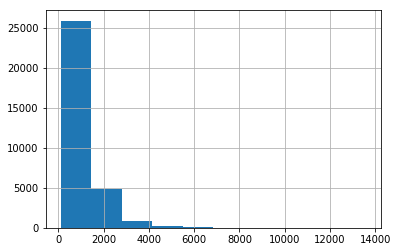

In [14]:
data.EMI.hist()

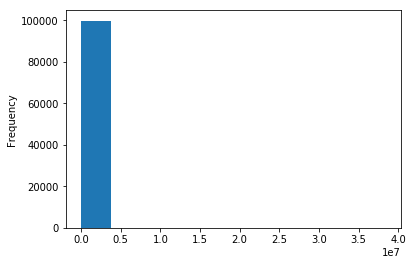

In [51]:
data.Monthly_Income.plot(kind='hist')

C:\Users\319711297\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


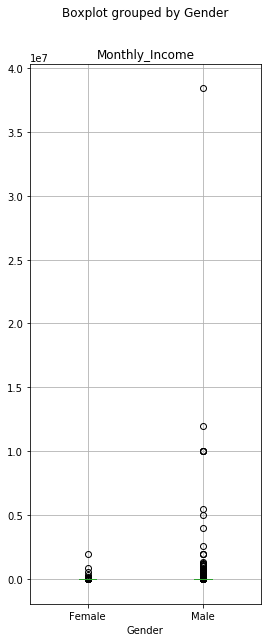

In [88]:
# differece in monthly income, medianissame but there are highly paid males which re otliers
train.boxplot(column='Monthly_Income',by='Gender', figsize= (4,10))
         # Column to split upon
              

In [15]:
groupbyGender=train.groupby(['Gender','Approved'])

In [16]:
groupbyGender.size().unstack()

Approved,0,1
Gender,,
Female,29516,248
Male,39177,772


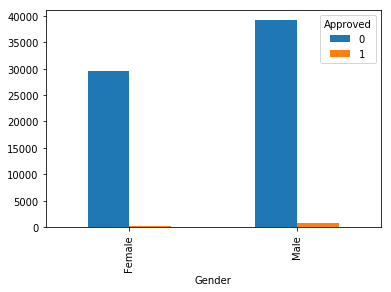

In [17]:
groupbyGender.size().unstack().plot(kind='bar',)
# not significant difference since males get rejected alot and also approved

In [64]:
groupbyCity_Cat=train.groupby(['City_Category','Approved'])

In [65]:
groupbyCity_Cat.size().unstack()

Approved,0,1
City_Category,,
A,49059,826
B,7222,98
C,11600,94


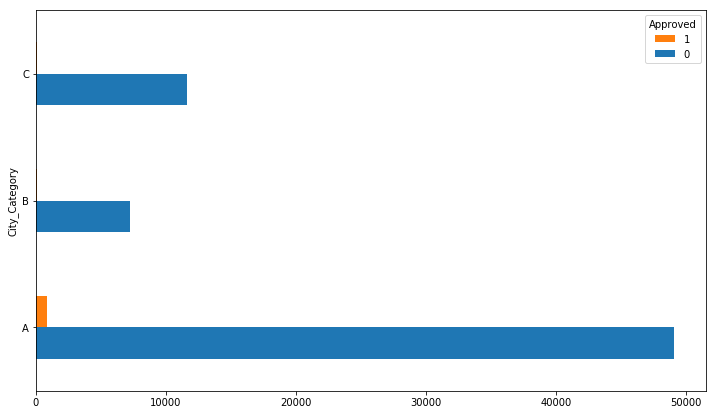

In [66]:
#hifhest applicants
groupbyCity_Cat.size().unstack().plot(kind='barh',subplots=False,figsize=[12,7],legend='reverse')

In [67]:
groupbycontact=train.groupby(['Contacted','Approved'])

In [68]:
groupbycontact.size().unstack()
# contacted ge approved more 
#do same for source,existing emi etc

Approved,0,1
Contacted,,
N,24265,173
Y,44428,847


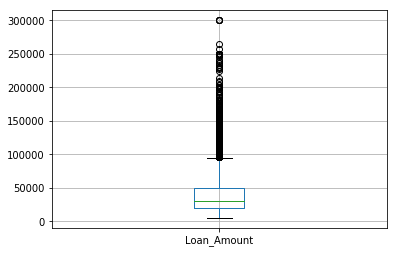

In [69]:
train.boxplot(column='Loan_Amount')
#outliers alert
#need to fix mising vals n outlier
#skip the vars with high missing vals

In [70]:
groupbyempl_Cat=train.groupby(['Employer_Category1','Approved'])
groupbyempl_Cat.size().unstack()

Approved,0,1
Employer_Category1,,
A,32975,361
B,17704,352
C,14001,302


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F54D080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F83D6A0>], dtype=object)

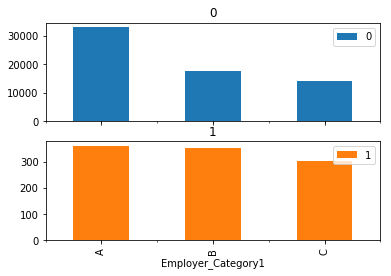

In [71]:
#groupbyCity_Cat.size().unstack().plot(kind='scatter',x='Employer_Category1',y='Approved')
#plt.scatter(groupbyCity_Cat['Employer_Category1'],groupbyCity_Cat['Approved'],s=80)
groupbyempl_Cat.size().unstack().plot(kind='bar',subplots=True)

In [72]:
#grouping employees by category 2
groupbyempl2_Cat=train.groupby(['Employer_Category2','Approved'])
groupbyempl2_Cat.size().unstack()

Approved,0,1
Employer_Category2,,
1.0,4168,90
2.0,1900,55
3.0,1592,28
4.0,56748,834


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F827828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000098C7B70>], dtype=object)

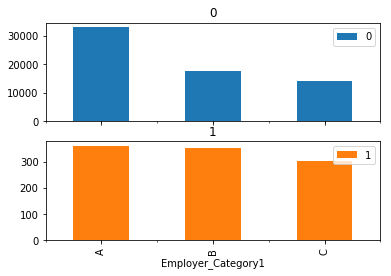

In [73]:
groupbyempl_Cat.size().unstack().plot(kind='bar',subplots=True,sharex=True)

In [74]:

gbPrimary_Bank_Type=train.groupby(['Primary_Bank_Type','Approved'])
gbPrimary_Bank_Type.size().unstack()

Approved,0,1
Primary_Bank_Type,,
G,20507,196
P,38815,804


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FEF7860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000107EC0F0>], dtype=object)

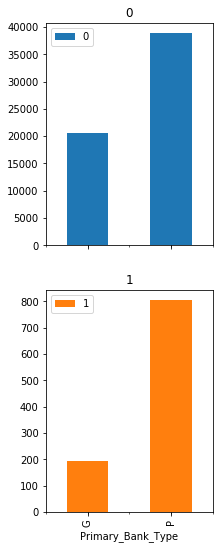

In [77]:
gbPrimary_Bank_Type.size().unstack().plot(kind='bar',subplots=True,figsize=[3,9])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000108A3320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010998F98>], dtype=object)

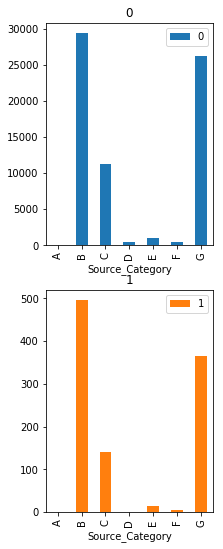

In [79]:

gbSource_Category=train.groupby(['Source_Category','Approved'])
gbSource_Category.size().unstack()
gbSource_Category.size().unstack().plot(kind='bar',subplots=True,figsize=[3,9],sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000123E2F28>]], dtype=object)

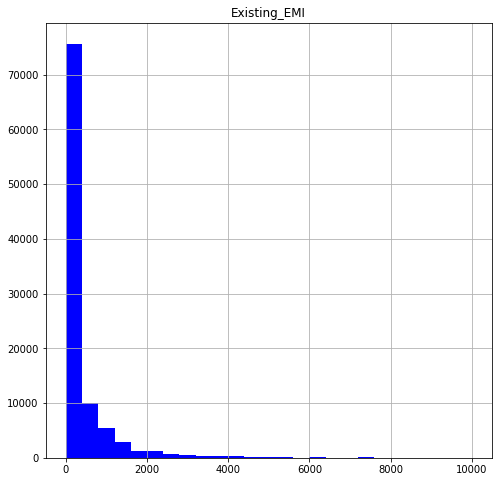

In [85]:
data.hist(column="Existing_EMI",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue",          # Plot color
              bins=25,               # Use 50 bins
              range= (0,10000)) 

In [123]:
#binning existing emi
#arr=pd.cut(data['Existing_EMI'],bins=[0.0,1.0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000])
bins = numpy.linspace(0, 357, 545436)
bin_means = (np.histogram(data['Existing_EMI'], bins, weights=data['Existing_EMI'],range=[0,60])[0] /
             np.histogram(data['Existing_EMI'], bins)[0])
bin_means

ValueError: range parameter must be finite.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012866DD8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000128CB9E8>], dtype=object)

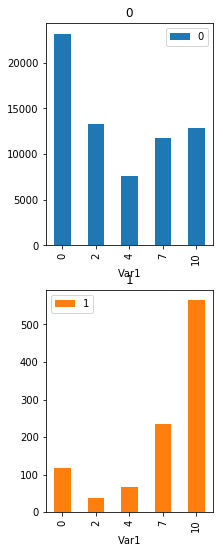

In [91]:

gbVar1=train.groupby(['Var1','Approved'])
gbVar1.size().unstack()
gbVar1.size().unstack().plot(kind='bar',subplots=True,figsize=[3,9],sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013B135F8>]], dtype=object)

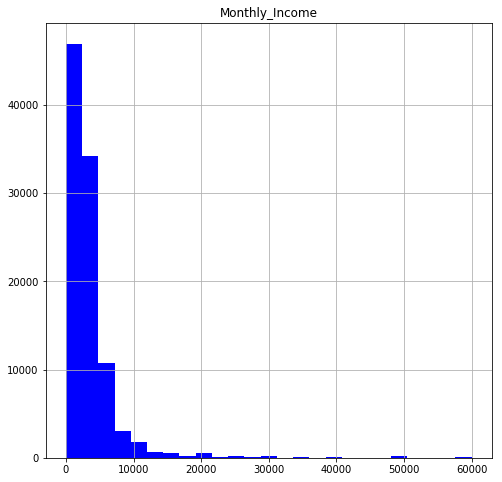

In [137]:
data.hist(column="Monthly_Income",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue",          # Plot color
              bins=25,               # Use 50 bins
              range= (0,60000)) 

In [108]:
import datetime as DT



now = DT.datetime.now()    
age = now - pd.to_datetime(data['DOB'])

In [111]:
from datetime import date, timedelta

age = (date.today() - pd.to_datetime(data['DOB'])) // timedelta(days=365.2425)

TypeError: can only operate on a timedeltas for addition, subtraction, and division, but the operator [__floordiv__] was passed

In [162]:
from datetime import datetime

today=datetime.today()
age=pd.to_datetime(data['DOB']).year-today.year
age

AttributeError: 'Series' object has no attribute 'year'

In [158]:
from datetime import datetime



    b_date = datetime.strptime(data['DOB'][x], '%m/%d/%Y')

Age = ((datetime.today() - b_date).days/365)
Age

KeyError: '23/07/79'

In [186]:
dateob=pd.to_datetime(train['DOB'],infer_datetime_format=True,format='%m/%d/%Y')

In [188]:
train['DOB']=dateob

C:\Users\319711297\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
train['age'] = train['DOB'].map(lambda x: age(date(int('19' + x[-2:]), int(x[:2]), int(x[2:-2])), date.today()))

TypeError: 'Timestamp' object is not subscriptable

In [219]:
data['City_Category'] = data['City_Category'].fillna(data['City_Category'].value_counts().index[0])

In [220]:
data['City_Code'] = data['City_Code'].fillna(data['City_Code'].value_counts().index[0])


In [221]:
data['City_Category'].value_counts()

A    72511
C    16761
B    10478
Name: City_Category, dtype: int64

In [217]:
#data = data.fillna(data.mode())
data['Employer_Category1'] = data['Employer_Category1'].fillna(data['Employer_Category1'].value_counts().index[0])
data['Employer_Category2'] = data['Employer_Category2'].fillna(data['Employer_Category2'].value_counts().index[0])
data['Employer_Code'] = data['Employer_Code'].fillna(data['Employer_Code'].value_counts().index[0])

In [203]:
data['Existing_EMI'] = data['Existing_EMI'].fillna(data['Existing_EMI'].median())

In [204]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [228]:
train.columns

Index([''ID', 'Approved', 'City_Category', 'City_Code', 'Contacted',
       'Customer_Existing_Primary_Bank_Code', 'DOB', 'EMI',
       'Employer_Category1', 'Employer_Category2', 'Employer_Code',
       'Existing_EMI', 'Gender', 'Interest_Rate', 'Lead_Creation_Date',
       'Loan_Amount', 'Loan_Period', 'Monthly_Income', 'Primary_Bank_Type',
       'Source', 'Source_Category', 'Var1', 'source'],
      dtype='object')

In [232]:
train.drop('source',axis=1)

,'ID,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,...,Gender,Interest_Rate,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source,Source_Category,Var1
0,APPC90493171225,0.0,A,C10001,N,B001,23/07/79,NaN,A,4.0,...,Female,NaN,2015/07/16,NaN,NaN,2000.0,P,S122,G,0
1,APPD40611263344,0.0,A,C10003,Y,B002,07/12/86,953.0,C,1.0,...,Male,13.25,2004/07/16,20000.0,2.0,3500.0,P,S122,G,10
2,APPE70289249423,0.0,C,C10125,Y,B003,10/12/82,NaN,C,4.0,...,Male,NaN,2019/07/16,45000.0,4.0,2250.0,G,S143,B,0
3,APPF80273865537,0.0,C,C10477,Y,B003,30/01/89,NaN,A,4.0,...,Male,NaN,2009/07/16,92000.0,5.0,3500.0,G,S143,B,7
4,APPG60994436641,0.0,A,C10002,Y,B001,19/04/85,NaN,A,4.0,...,Male,NaN,2020/07/16,50000.0,2.0,10000.0,P,S134,B,10
5,APPI90914237819,0.0,C,C10402,N,B014,23/12/88,NaN,A,4.0,...,Female,NaN,2001/07/16,NaN,NaN,7000.0,P,S133,B,0
6,APPK80327232033,0.0,B,C10022,Y,B003,28/03/73,3082.0,B,4.0,...,Male,14.85,2002/07/16,130000.0,5.0,7500.0,G,S122,C,10
7,APPL20820172146,0.0,A,C10003,Y,B006,12/11/90,1088.0,A,4.0,...,Female,18.25,2003/07/16,30000.0,3.0,3000.0,P,S133,B,0
8,APPM30977401211,0.0,A,C10003,Y,B017,03/03/77,1749.0,A,4.0,...,Male,20.00,2002/07/16,66000.0,5.0,2500.0,G,S133,B,7
9,APPN60714112334,0.0,B,C10014,N,NaN,13/12/90,NaN,A,4.0,...,Female,NaN,2002/07/16,NaN,NaN,2500.0,NaN,S122,B,0


In [255]:
feature_Cols=['Employer_Category2']
X=train[feature_Cols]

X.tail()

,Employer_Category2
69708,1.0
69709,4.0
69710,4.0
69711,3.0
69712,1.0


In [256]:
y=train['Approved']

In [257]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

In [260]:
train['Employer_Category2'].value_counts()

4.0    57582
1.0     4258
2.0     1955
3.0     1620
Name: Employer_Category2, dtype: int64

In [259]:
#import model
from sklearn.linear_model import LogisticRegression

#instantiate
LoReg=LogisticRegression()
#making the model learn the relationship... this is the model training process... learning the cofficients
LoReg.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [238]:
data.apply(lambda x: sum(x.isnull()),axis=0)

'ID                                        0
Approved                               30037
City_Category                              0
City_Code                                  0
Contacted                                  0
Customer_Existing_Primary_Bank_Code    13428
DOB                                       18
EMI                                    67821
Employer_Category1                         0
Employer_Category2                         0
Employer_Code                              0
Existing_EMI                               0
Gender                                     0
Interest_Rate                          67821
Lead_Creation_Date                         0
Loan_Amount                            39579
Loan_Period                            39579
Monthly_Income                             0
Primary_Bank_Type                      13428
Source                                     0
Source_Category                            0
Var1                                       0
source    